In [33]:
import numpy as np
import os
from matplotlib import image
from matplotlib import pyplot as plt
from PIL import Image
import math
import cv2

In [159]:
img_dir = 'C:\\Users\\mattr\\QMIND\\Cooperators-Insurance\\StreetViewImages'
img_names = os.listdir(img_dir)
imgs = []

# Store each photo as a grayscale, matrix version of the picture
for img in img_names:
    pic = cv2.imread(img_dir + '\\' + img)
    gray = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY)          
    imgs.append(gray)


Name: 10 Calumet Cres, Scarborough.jpg
Data type: uint8
Shape: (600, 640)



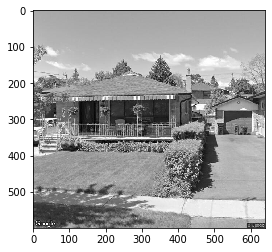

In [160]:
# Get an idea of what we are dealing with here
test_img = imgs[3]

print('Name: ' + img_names[3])
print('Data type: ' + str(test_img.dtype))
print('Shape: ' + str(test_img.shape))
print()
plt.imshow(test_img)

In [125]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard

In [161]:
#Build our convolution autoencoder model
input_img = Input(shape=(600, 640, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Complete model - from input image to reconstructed image
autoencoder = Model(input_img, decoded)

# Half model - outputs reduced image
# encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [162]:
split = 0.1
n = math.floor(len(imgs) * split)

train = np.array(imgs[n:])
test = np.array(imgs[:n])

train = train.astype('float32') / 255.
test = test.astype('float32') / 255.

train = np.reshape(train, (len(train), 600, 640, 1))
test = np.reshape(test, (len(test), 600, 640, 1))

In [ ]:
autoencoder.fit(train, train,
                epochs=5,
                batch_size=32,
                shuffle=True,
                validation_data=(test, test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 259 samples, validate on 28 samples
Epoch 1/5


In [129]:
decoded_imgs = autoencoder.predict(test)

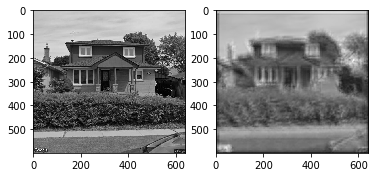

In [144]:
plt.subplot(1,2, 1)
plt.imshow(test[11].reshape(600, 640))
plt.gray()
plt.subplot(1,2, 2)

plt.imshow(decoded_imgs[11].reshape(600, 640))
plt.gray()
plt.show()

In [145]:
encoder = Model(input_img, encoded)


In [146]:
encoded_imgs = encoder.predict(test)

In [139]:
print(encoded_imgs[1].shape)

(75, 80, 8)


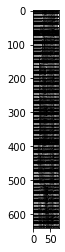

In [148]:
plt.imshow(encoded_imgs[11].reshape(75, 80 * 8).T)
plt.gray()

# With reduced image size

In [142]:
# Store each photo as a grayscale, matrix version of the picture
imgs = []
for img in img_names:
    pic = cv2.imread(img_dir + '\\' + img)
    pic = cv2.cvtColor(pic,cv2.COLOR_BGR2GRAY) 
    pic_resz = cv2.resize(pic, (0,0), fx=0.4, fy=0.4)
    imgs.append(pic_resz)

In [109]:
print(imgs[1].shape)

(240, 256)


In [149]:
#Build our convolution autoencoder model
input_img = Input(shape=(240, 256, 1))

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Complete model - from input image to reconstructed image
autoencoder = Model(input_img, decoded)

# Half model - outputs reduced image
encoder = Model(input_img, encoded)

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [150]:
split = 0.1
n = math.floor(len(imgs) * split)

train = np.array(imgs[n:])
test = np.array(imgs[:n])

train = train.astype('float32') / 255.
test = test.astype('float32') / 255.

train = np.reshape(train, (len(train), 240, 256, 1))
test = np.reshape(test, (len(test), 240, 256, 1))

In [151]:
autoencoder.fit(train, train,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(test, test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 259 samples, validate on 28 samples
Epoch 1/10
259/259 [==============================] - 46s 176ms/step - loss: 0.6909 - val_loss: 0.6866
Epoch 2/10
259/259 [==============================] - 28s 108ms/step - loss: 0.6832 - val_loss: 0.6795
Epoch 3/10
259/259 [==============================] - 27s 105ms/step - loss: 0.6720 - val_loss: 0.6895
Epoch 4/10
259/259 [==============================] - 27s 106ms/step - loss: 0.6539 - val_loss: 0.7117
Epoch 5/10
259/259 [==============================] - 29s 111ms/step - loss: 0.6521 - val_loss: 0.6230
Epoch 6/10
259/259 [==============================] - 29s 112ms/step - loss: 0.6400 - val_loss: 0.6179
Epoch 7/10
259/259 [==============================] - 29s 111ms/step - loss: 0.6322 - val_loss: 0.6111
Epoch 8/10
259/259 [==============================] - 25s 95ms/step - loss: 0.6298 - val_loss: 0.6101
Epoch 9/10
259/259 [==============================] - 25s 96ms/step - loss: 0.6222 - val_loss: 0.6080
Epoch 10/10
259/259 [=========

In [152]:
decoded_imgs = autoencoder.predict(test)


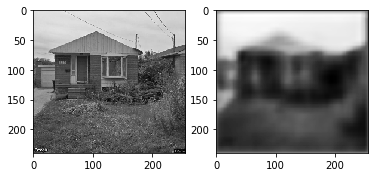

In [154]:
plt.subplot(1,2, 1)
plt.imshow(test[12].reshape(240, 256))
plt.gray()
plt.subplot(1,2, 2)

plt.imshow(decoded_imgs[12].reshape(240, 256))
plt.gray()
plt.show()

In [155]:
encoded_imgs = encoder.predict(test)
print(encoded_imgs[1].shape)

(30, 32, 8)


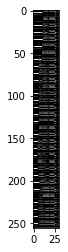

In [157]:
plt.imshow(encoded_imgs[11].reshape(30, 32*8).T)
plt.gray()